
*Ady Luisa Gonzalez Aguirre 1991986 *

# **PIA: Entrenamiento de una Red Neuronal Convolucional**
2. Entrenar a una Red Neuronal Convolucional con el conjunto de datos MNIST que se encuentra dentro de Keras y ponerlo a prueba con el conjunto de imágenes que ustedes generaron.


In [2]:
#librerias 
import tensorflow as tf
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

Saving PIA1.zip to PIA1 (1).zip


In [3]:
#tener acceso a las imagenes 
import zipfile
import io 
data = zipfile.ZipFile(io.BytesIO(uploaded['PIA1.zip']),'r')
data.extractall()
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']


# Preprocesamiento
Principalmente tuve un problema con el procesamiento de las imagenes porque me marcaba que tenian una forma invalida, entonces los comentarios son el codigo que yo estaba haciendo antes de que me fallara ese aspecto, despues procedi a hacerlo de otra manera.

In [162]:
#cargar imagenes 
#import cv2
#import matplotlib.pyplot as plt
#import glob
#arreglos vacios
#imagenes_dataset = []
#etiquetas_dataset = []
#file = '/content/Entrenamiento' 

#for img in glob.iglob(f'{file}/*.jpg'):
  
  #print(img)
  #test_image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

  # Formato de imagen
  #img_resized = cv2.resize(test_image, (28,28),)
  #img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  #imagenes_dataset.append([img_resized])
  #etiquetas_dataset.append([class_names])

  # Preview de la imagen de prueba
  #plt.imshow(test_image, cmap='gray')


In [ ]:
imagenes_dataset

In [ ]:
etiquetas_dataset

In [164]:
#dividir 80-20
mnist_data = tf.keras.datasets.mnist
#from sklearn.model_selection import train_test_split
(train_images,train_labels),(test_images,test_labels) = mnist_data.load_data()
#train_images, test_images = train_test_split(imagenes_dataset,test_size=0.2)

#print("Ejemplos usados para entrenar: ", len(train_images))
#print("Ejemplos usados para test: ", len(test_images))

In [110]:
#train_images = np.array(train_images)
#test_images = np.array(test_images)

In [165]:
train_images_scaled = train_images/255
test_images_scaled = test_images/255


In [171]:
len(train_images_scaled)

60000

In [170]:
len(test_images_scaled)

10000

In [166]:
train_images_scaled = train_images_scaled[...,np.newaxis]
test_images_scaled = test_images_scaled[...,np.newaxis]

In [169]:
#train_images_scaled[0].shape


In [168]:
#test_images_scaled[0].shape

In [167]:
#train_images = np.array(train_images)
#test_images = np.array(test_images)

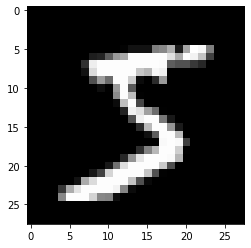

In [212]:
plt.imshow(train_images[0], cmap='gray')

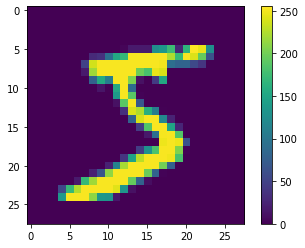

In [206]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

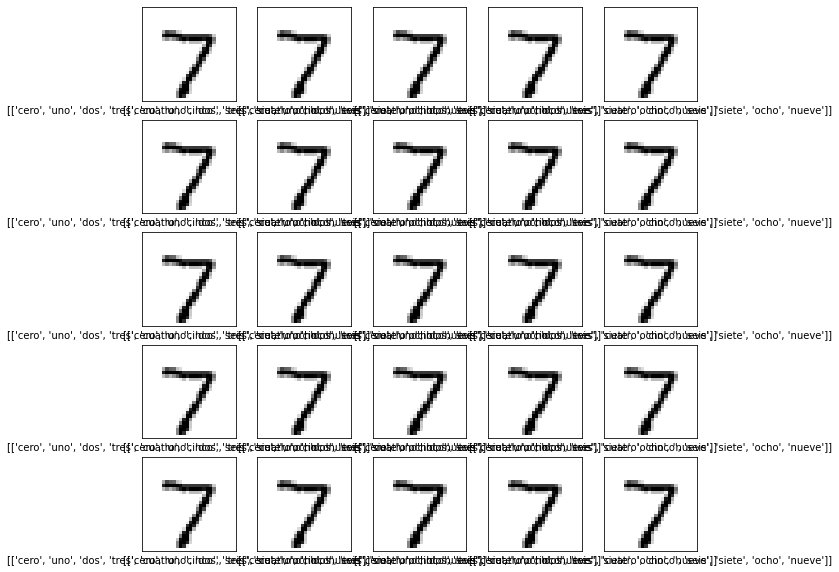

In [213]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[0], cmap=plt.cm.binary)
    plt.xlabel(etiquetas_dataset[i])
plt.show()

# Estructura y entrenamiento de RNAC

In [174]:
model = Sequential([
    Conv2D(8,(3,3),activation='relu',padding='SAME',input_shape=train_images_scaled[0].shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
                           ])


In [175]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                100416    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [180]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [181]:
#entrenamiento 
history = model.fit(train_images_scaled, train_labels, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2052 - accuracy: 0.9402
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0374 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0295 - accuracy: 0.9905


In [182]:
Frame = pd.DataFrame(history.history)

# Resultados de la exactitud de la RNAC

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

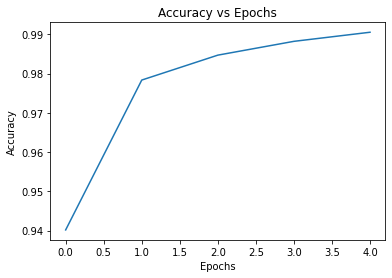

In [183]:
acc_plot = Frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

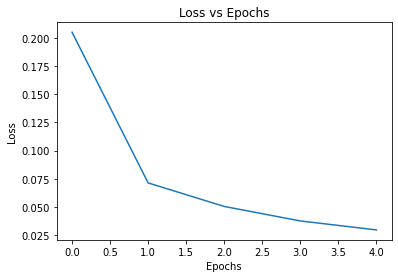

In [184]:
acc_plot = Frame.plot(y="loss", title="Loss vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [185]:
#mostrar perdida y precision sin calculos
test_loss, test_accuracy = model.evaluate(test_images_scaled, test_labels, verbose = 0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.04988112300634384
Test accuracy: 0.9833999872207642


# Predicciones 
se muestran al menos 10 predicciones 

1/1 [==============================] - 0s 21ms/step


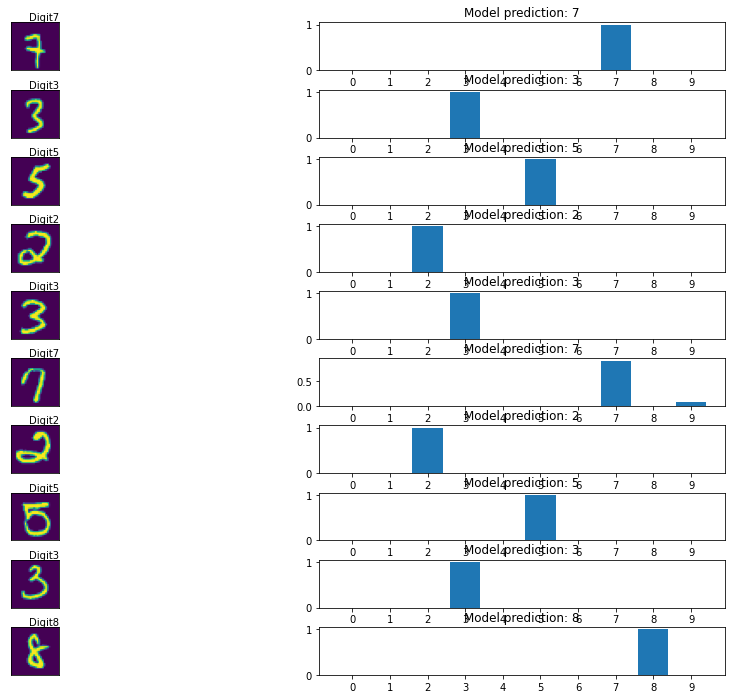

In [214]:
num_test_images = test_images_scaled.shape[0]

random_inx = np.random.choice(num_test_images,10)
random_test_images = test_images_scaled[random_inx,...]
random_test_labels = test_labels[random_inx,...]
 
predictions = model.predict(random_test_images)

fig,axes = plt.subplots(10,2,figsize=(16,12))
fig.subplots_adjust(hspace=0.4,wspace=0.2)

for i, (prediction,image,label) in enumerate(zip(predictions, random_test_images,
                                                 random_test_labels)):
  axes[i,0].imshow(np.squeeze(image))
  axes[i,0].get_xaxis().set_visible(False)
  axes[i,0].get_yaxis().set_visible(False)
  axes[i,0].text(10.,-1.5,f'Digit{label}')
  axes[i,1].bar(np.arange(len(prediction)),prediction)
  axes[i,1].set_xticks(np.arange(len(prediction)))
  axes[i,1].set_title(f"Model prediction: {np.argmax(prediction)}")

TypeError: ignored

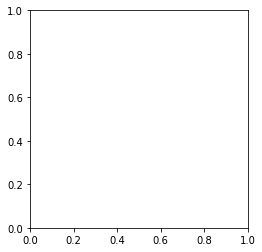

In [215]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import glob 
import cv2

fname = '/content/Entrenamiento/0.jpg'
#file = '/content/Entrenamiento' 

for img in glob.iglob(f'{file}/*.jpg'):
  x = img_to_array(load_img(fname,target_size=(28,28)))
  x = np.average(x,axis=2)
  x = x/255
  x = x[...,np.newaxis]
plt.imshow(x)

imagen = x[np.newaxis,...]
prediction = model.predict(imagen)


TypeError: ignored

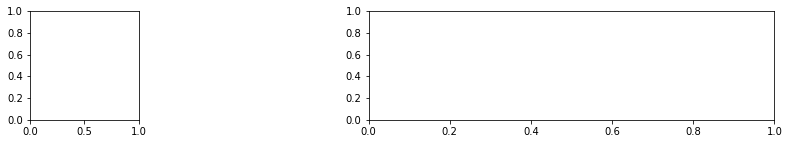

In [200]:
fig,axes = plt.subplots(1,2,figsize=(16,2))
fig.subplots_adjust(hspace=0.4,wspace=0.2)

axes[0].imshow(x)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[0].text(10.,-1.5,f'Digit{fname}')
axes[1].bar(np.arange(len(prediction[0])),prediction[0])
axes[1].set_xticks(np.arange(len(prediction[0])))
axes[1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction[0])}")
plt.show()